In [15]:
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Dense, Dropout

In [16]:
mnist = keras.datasets.mnist 
#Splitting into train and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [17]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

60000 train samples
10000 test samples


In [18]:
#Most common type of model is a stack of layers
model = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model.add(Dropout(0.3))
# Adding another dense layer:
model.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

# Compiling the model.
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
training = model.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 

Epoch 1/31
375/375 [==============================] - 6s 13ms/step - loss: 0.3041 - accuracy: 0.9085 - val_loss: 0.1231 - val_accuracy: 0.9643
Epoch 2/31
375/375 [==============================] - 4s 11ms/step - loss: 0.1258 - accuracy: 0.9613 - val_loss: 0.0973 - val_accuracy: 0.9704
Epoch 3/31
375/375 [==============================] - 4s 9ms/step - loss: 0.0904 - accuracy: 0.9719 - val_loss: 0.0887 - val_accuracy: 0.9743
Epoch 4/31
375/375 [==============================] - 4s 9ms/step - loss: 0.0717 - accuracy: 0.9777 - val_loss: 0.0865 - val_accuracy: 0.9759
Epoch 5/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0608 - accuracy: 0.9809 - val_loss: 0.0824 - val_accuracy: 0.9778
Epoch 6/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0874 - val_accuracy: 0.9772
Epoch 7/31
375/375 [==============================] - 4s 10ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0898 - val_accuracy: 0.9754
E

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


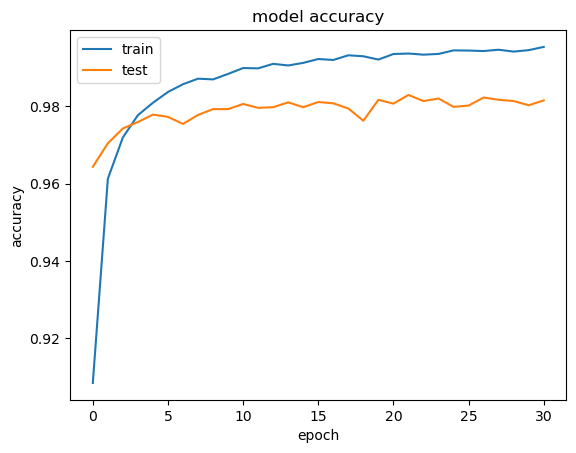

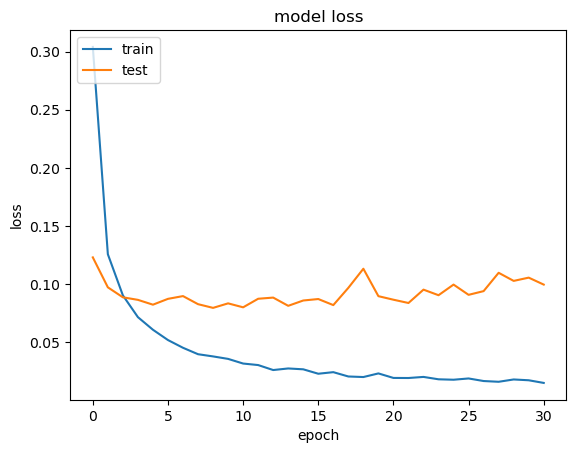

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#evaluate the model_4
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0793 - accuracy: 0.9846
Test accuracy: 0.9846000075340271
